In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shaunthesheep/microsoft-catsvsdogs-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\nisar\.cache\kagglehub\datasets\shaunthesheep\microsoft-catsvsdogs-dataset\versions\1


In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [3]:
import os
import numpy as np
from PIL import Image, UnidentifiedImageError
import imghdr

dataset_path = r"C:\Users\nisar\.cache\kagglehub\datasets\shaunthesheep\microsoft-catsvsdogs-dataset\versions\1\PetImages"

data = []
labels = []
IMG_SIZE = 64

for category in ["Cat", "Dog"]:
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        try:
            if img_name.lower() == "thumbs.db":
                continue            
            img_path = os.path.join(folder_path, img_name)
            if imghdr.what(img_path) is None:
                print(f"Skipping invalid image {img_name}")
                continue
            img = Image.open(img_path).convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE))
            img_array = np.array(img).flatten()
            data.append(img_array)
            labels.append(category)
        except (UnidentifiedImageError, IOError, ValueError) as e:
            print(f"Error loading image {img_name}: {e}")

data = np.array(data)
labels = np.array(labels)

C:\Users\nisar\AppData\Local\Temp\ipykernel_3804\680245769.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Skipping invalid image 10404.jpg
Skipping invalid image 11196.jpg
Skipping invalid image 1476.jpg
Skipping invalid image 1483.jpg
Skipping invalid image 1815.jpg
Skipping invalid image 2101.jpg
Skipping invalid image 3089.jpg
Skipping invalid image 4165.jpg
Skipping invalid image 6438.jpg
Skipping invalid image 666.jpg
Skipping invalid image 7245.jpg
Skipping invalid image 7441.jpg
Skipping invalid image 780.jpg
Skipping invalid image 8157.jpg
Skipping invalid image 8335.jpg
Skipping invalid image 925.jpg
Skipping invalid image 10163.jpg
Skipping invalid image 10745.jpg
Skipping invalid image 10949.jpg
Skipping invalid image 11702.jpg
Skipping invalid image 2339.jpg
Skipping invalid image 4515.jpg
Skipping invalid image 4855.jpg
Skipping invalid image 5797.jpg
Skipping invalid image 6086.jpg
Skipping invalid image 7083.jpg
Skipping invalid image 7496.jpg
Skipping invalid image 7989.jpg


C:\Users\nisar\AppData\Roaming\Python\Python311\site-packages\PIL\TiffImagePlugin.py:870: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [4]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 19977
Testing set size: 4995


In [5]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)
print("SVM model training complete.")

SVM model training complete.


In [6]:
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 66.17%
Classification Report:
              precision    recall  f1-score   support

         Cat       0.68      0.64      0.66      2548
         Dog       0.65      0.68      0.66      2447

    accuracy                           0.66      4995
   macro avg       0.66      0.66      0.66      4995
weighted avg       0.66      0.66      0.66      4995



In [7]:
import joblib
joblib.dump(svm_model, "svm_cats_vs_dogs_model.pkl")
print("Model saved as 'svm_cats_vs_dogs_model.pkl'.")
loaded_model = joblib.load("svm_cats_vs_dogs_model.pkl")
print("Model loaded successfully.")

Model saved as 'svm_cats_vs_dogs_model.pkl'.
Model loaded successfully.


In [10]:
import matplotlib.pyplot as plt
def display_image_prediction(image_path, prediction, true_label):
    img = Image.open(image_path).convert('L')
    img = img.resize((IMG_SIZE, IMG_SIZE))
    plt.imshow(img, cmap='gray')
    plt.title(f"Prediction: {label_encoder.inverse_transform([prediction])[0]}, True Label: {label_encoder.inverse_transform([true_label])[0]}")
    plt.axis('off')
    plt.show()

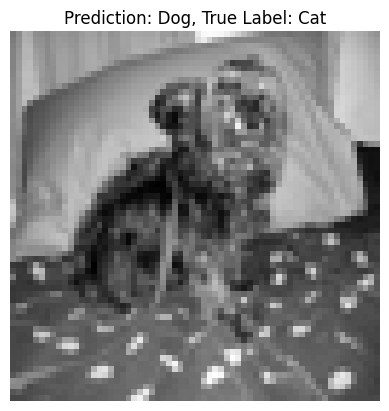

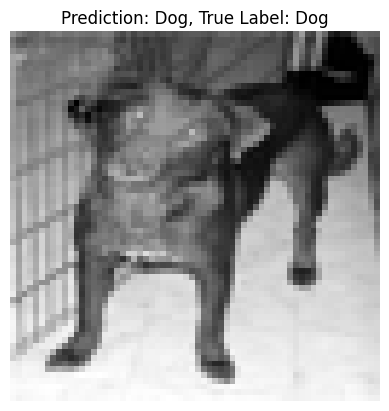

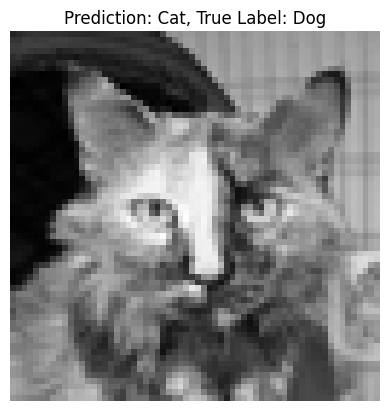

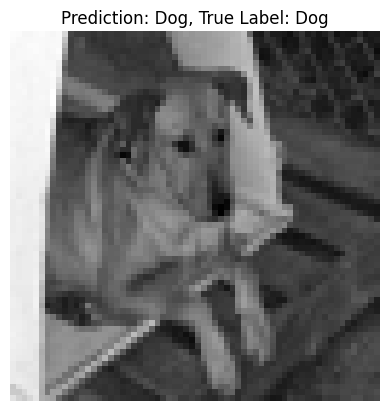

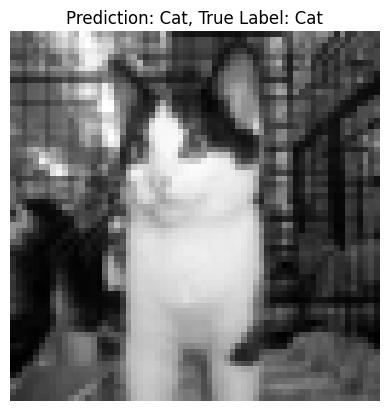

In [11]:
for i in range(5): 
    img_path = os.path.join(dataset_path, "Cat" if y_pred[i] == 0 else "Dog", os.listdir(os.path.join(dataset_path, "Cat" if y_pred[i] == 0 else "Dog"))[i])
    display_image_prediction(img_path, y_pred[i], y_test[i])